#### Etapa de Entrenamiento y Evaluación del Modelo de Aprendizaje Supervisado de Regresión

In [1]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import matplotlib.pyplot as plt
from pickle import dump

Ya que algunos algoritmos como los lineales y los de Boosting exigen tener los datos
normalizados, pues se procede a realizar dicho paso.

In [2]:
dataframe = pd.read_csv('/workspaces/ProyectoDS/data/processed/data_clean.csv')
dataframe.head()

,PLAYER_ID,PTS,MIN_PROM,FGM_PROM,FGA_PROM,FG3M_PROM,FG3A_PROM,FTM_PROM,FTA_PROM,OREB_PROM,...,STL_PROM,BLK_PROM,BLKA_PROM,PF_PROM,PFD_PROM,PTS_PROM,PLUS_MINUS_PROM,PTSRTeam_PROM,PTSTeam_PROM,W_PCTTeam_PROM
0,2544,22,28.350000,7.0,17.0,3.000000,8.0,5.000000,7.00,2.00,...,0.000000,0.00,1.000000,2.00,6.000000,22.000000,2.000000,116.000000,109.000000,0.00000
1,2544,22,28.350000,7.0,17.0,3.000000,8.0,5.000000,7.00,2.00,...,0.000000,0.00,1.000000,2.00,6.000000,22.000000,2.000000,116.000000,109.000000,0.00000
2,2544,18,29.875000,7.5,17.5,3.000000,8.0,4.000000,5.50,1.50,...,0.500000,0.00,1.000000,1.00,5.000000,22.000000,9.000000,115.500000,123.500000,0.25000
3,2544,29,28.650000,7.0,16.0,2.333333,7.0,4.333333,6.00,1.00,...,0.666667,0.00,0.666667,1.00,5.333333,20.666667,11.333333,107.333333,124.666667,0.38900
4,2544,26,30.466667,8.0,17.0,2.500000,7.0,4.250000,5.75,1.25,...,1.000000,0.25,1.000000,1.25,4.750000,22.750000,8.500000,109.250000,120.250000,0.41675


In [3]:
#Se separan los datos de entrenamiento y prueba

X = dataframe.drop(['PTS'], axis = 1)
y = dataframe['PTS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [4]:
#Se realiza la normalización de los datos

#Columnas de las variables predictoras
n_columns = X.columns.tolist()

#Se inicializa la función
scaler = StandardScaler()

#Se ajusta el scaler a los datos de entrenamiento
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, index = X_train.index, columns = n_columns)

X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, index = X_test.index, columns = n_columns)

In [5]:
X_test_scaled.head()

,PLAYER_ID,MIN_PROM,FGM_PROM,FGA_PROM,FG3M_PROM,FG3A_PROM,FTM_PROM,FTA_PROM,OREB_PROM,DREB_PROM,...,STL_PROM,BLK_PROM,BLKA_PROM,PF_PROM,PFD_PROM,PTS_PROM,PLUS_MINUS_PROM,PTSRTeam_PROM,PTSTeam_PROM,W_PCTTeam_PROM
32182,0.658931,0.587941,0.740498,0.979923,0.960608,0.763749,-0.139991,0.137703,1.114954,2.207345,...,-0.561365,1.842957,0.355121,0.375555,0.721569,0.643615,-0.870403,-0.014473,0.443834,-1.251793
53479,-1.494717,0.878471,0.047690,-0.285500,-1.091694,-1.196499,1.710360,1.664684,2.832174,1.634077,...,-0.196265,1.842957,-0.109524,1.457926,1.601530,0.282614,-1.809369,0.545053,-1.009776,-0.233392
60887,0.663165,0.401242,0.124668,0.251346,-0.345402,-0.020350,-0.718226,-0.816660,-0.602267,0.296450,...,0.168836,-0.091837,-0.574170,-0.273868,-1.038352,-0.133925,-0.000991,0.125408,0.899869,1.156863
55277,-1.493954,0.851699,1.433306,1.094962,0.400890,0.528519,2.635535,2.332738,2.402869,1.442987,...,0.168836,1.069039,-0.109524,0.808503,2.230073,1.726616,-0.661744,0.964697,-0.952772,-0.046266
46641,0.665523,0.054723,-1.106991,-1.062009,-1.091694,-1.176896,-0.949520,-1.007533,0.578322,-0.921745,...,0.077561,0.585341,0.122799,0.429673,-0.849789,-1.189157,1.346599,-0.357183,-1.601196,-2.637850


Se evaluarán varios modelos en su forma estándar y a partir de allí se decidirá cuál procederá a la fase de optimización.

In [6]:
modelos = {"Lineal" : LinearRegression(),
           "Lasso" : Lasso(),
           "Ridge" : Ridge(),
           "Decision tree" : DecisionTreeRegressor(),
           "Random forest" : RandomForestRegressor(),
           "Boosting" :  XGBRegressor(),
           "KNeighbors": KNeighborsRegressor()}

In [7]:
def prueba_modelos(modelos, X_train, X_test, y_train, y_test):

  result_training = {}

  for names, model in modelos.items():

    model.fit(X_train, y_train)    
    y_pred = model.predict(X_test)
    r2_score_ = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    result_training[names] = (r2_score_, rmse)

  return result_training

In [8]:
resultados_base = prueba_modelos(modelos=modelos, X_train=X_train_scaled, X_test=X_test_scaled, y_train=y_train, y_test=y_test)
for key, values in resultados_base.items():
    print(f"{key}:")
    print(f"  Coeficiente de determinación (R^2): {values[0]}")
    print(f"  RMSE: {values[1]}\n")

Lineal:
  Coeficiente de determinación (R^2): 0.5240885063403183
  RMSE: 6.04255269074052

Lasso:
  Coeficiente de determinación (R^2): 0.5047482997046095
  RMSE: 6.1641093866107175

Ridge:
  Coeficiente de determinación (R^2): 0.5240885686841794
  RMSE: 6.042552294956763

Decision tree:
  Coeficiente de determinación (R^2): 0.025199376940473917
  RMSE: 8.647991387253143

Random forest:
  Coeficiente de determinación (R^2): 0.512015797133831
  RMSE: 6.118715084885427

Boosting:
  Coeficiente de determinación (R^2): 0.5066651679327379
  RMSE: 6.152168750324893

KNeighbors:
  Coeficiente de determinación (R^2): 0.4687418806952999
  RMSE: 6.384253740736669



In [9]:
coef_base = 0.5240885686841794
error_base = 6.042552294956763

El modelo que fue superior a todos tanto en el parámetro del Coeficiente de Determinación (R^2) como también en el RMSE, fue el modelo Ridge, por lo tanto pasará al proceso de optimización de hiperparámetros.

Primero se aplicará un RandomSearch para conocer en qué rango de valores están los mejores hiperparámetros y luego un GridSearch para optimizar la búsqueda de los mismos.

In [10]:
#Definición de parámetros
parametros = {'alpha': np.linspace(0,100,201),
              'max_iter': [1000, 2500, 5000, 10000, 15000]}

In [11]:
#Entrenamiento del modelo con RandomSearch
modelo = Ridge(random_state=42)
random_model = RandomizedSearchCV(estimator = modelo, param_distributions = parametros, 
                                  n_jobs = -1, cv = 5, scoring = 'neg_root_mean_squared_error')
random_model.fit(X_train_scaled, y_train)

RandomizedSearchCV(cv=5, estimator=Ridge(random_state=42), n_jobs=-1,
                   param_distributions={'alpha': array([  0. ,   0.5,   1. ,   1.5,   2. ,   2.5,   3. ,   3.5,   4. ,
         4.5,   5. ,   5.5,   6. ,   6.5,   7. ,   7.5,   8. ,   8.5,
         9. ,   9.5,  10. ,  10.5,  11. ,  11.5,  12. ,  12.5,  13. ,
        13.5,  14. ,  14.5,  15. ,  15.5,  16. ,  16.5,  17. ,  17.5,
        18. ,  18.5,  19. ,  19.5,  20. ,  20.5,  21. ,  21.5,  22. ,
        22.5,  23. ,  23.5,  24. ,  24.5,  25. ,  25.5,  26. ,  26.5,
        27. ,  27.5,  28. ,  28.5,  29. ,  29...
        67.5,  68. ,  68.5,  69. ,  69.5,  70. ,  70.5,  71. ,  71.5,
        72. ,  72.5,  73. ,  73.5,  74. ,  74.5,  75. ,  75.5,  76. ,
        76.5,  77. ,  77.5,  78. ,  78.5,  79. ,  79.5,  80. ,  80.5,
        81. ,  81.5,  82. ,  82.5,  83. ,  83.5,  84. ,  84.5,  85. ,
        85.5,  86. ,  86.5,  87. ,  87.5,  88. ,  88.5,  89. ,  89.5,
        90. ,  90.5,  91. ,  91.5,  92. ,  92.5,  93. ,  93.5,  94. ,
        94.5,  95. ,  95.5,  96. ,  96.5,  97. ,  97.5,  98. ,  98.5,
        99. ,  99.5, 100. ]),
                                        'max_iter': [1000, 2500, 5000, 10000,
                                                     15000]},
                   scoring='neg_root_mean_squared_error')

In [12]:
#Mejores parámetros
random_model.best_params_

{'max_iter': 10000, 'alpha': 32.5}

/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=2.45154e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


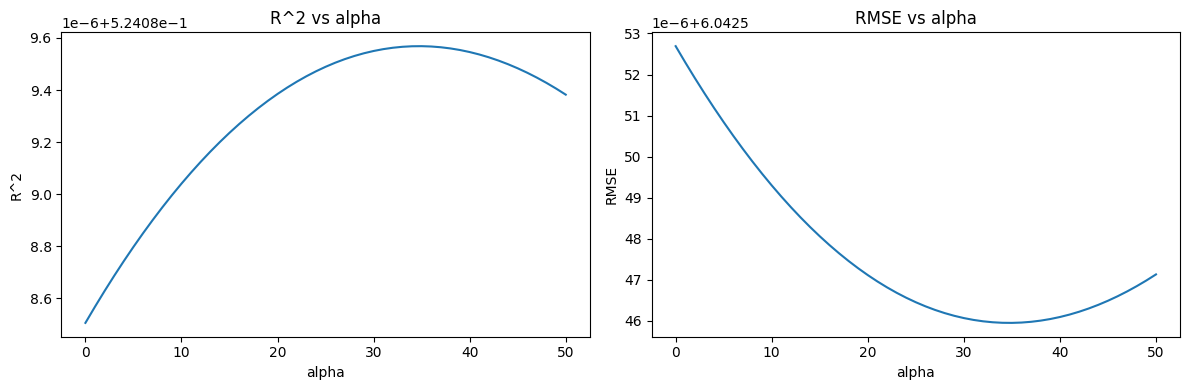

In [13]:
prueba_alpha = list(range(51))
r2 = []
error = []

for i in prueba_alpha:

    model = Ridge(alpha = i)
    model.fit(X_train_scaled, y_train)
    y_predict = model.predict(X_test_scaled)
    r2.append(r2_score(y_test, y_predict))
    error.append(np.sqrt(mean_squared_error(y_test, y_predict)))

fig, axis = plt.subplots(1, 2, figsize=(12,4))

axis[0].plot(prueba_alpha, r2)
axis[0].set_title('R^2 vs alpha')
axis[0].set_xlabel('alpha')
axis[0].set_ylabel('R^2')

axis[1].plot(prueba_alpha, error)
axis[1].set_title('RMSE vs alpha')
axis[1].set_xlabel('alpha')
axis[1].set_ylabel('RMSE')

plt.tight_layout()

plt.show()

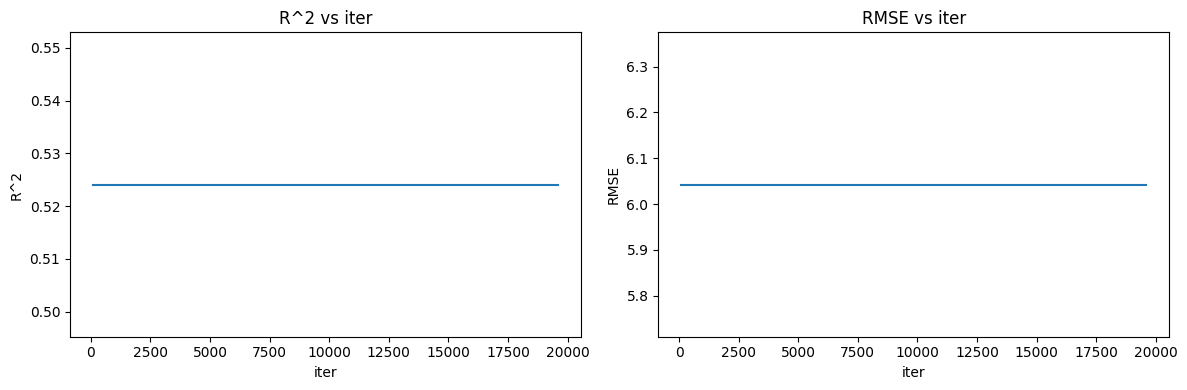

In [14]:
prueba_iter = list(np.arange(100,20001,500))

r2 = []
error = []

for i in prueba_iter:

    model = Ridge(max_iter = i)
    model.fit(X_train_scaled, y_train)
    y_predict = model.predict(X_test_scaled)
    r2.append(r2_score(y_test, y_predict))
    error.append(np.sqrt(mean_squared_error(y_test, y_predict)))

fig, axis = plt.subplots(1, 2, figsize=(12,4))

axis[0].plot(prueba_iter, r2)
axis[0].set_title('R^2 vs iter')
axis[0].set_xlabel('iter')
axis[0].set_ylabel('R^2')

axis[1].plot(prueba_iter, error)
axis[1].set_title('RMSE vs iter')
axis[1].set_xlabel('iter')
axis[1].set_ylabel('RMSE')

plt.tight_layout()

plt.show()

- Gracias a ambos gráficos, se hace aun más evidente que para valores de alpha entre 30 y 40 el Coef. de Determinación tiene un máximo y el RMSE presenta un mínimo.

- Además se evidencia que el parámetro max_iter no influye en en R^2 ni en el RMSE.

In [15]:
parametros2 = {'alpha': np.arange(30,40.005,0.05)}

In [16]:
#Entrenamiento del modelo con GridSearch
modelo = Ridge(random_state=42)
grid_model = GridSearchCV(estimator = modelo, param_grid = parametros2, 
                                  n_jobs = -1, cv = 5, scoring = 'neg_root_mean_squared_error')
grid_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=Ridge(random_state=42), n_jobs=-1,
             param_grid={'alpha': array([30.  , 30.05, 30.1 , 30.15, 30.2 , 30.25, 30.3 , 30.35, 30.4 ,
       30.45, 30.5 , 30.55, 30.6 , 30.65, 30.7 , 30.75, 30.8 , 30.85,
       30.9 , 30.95, 31.  , 31.05, 31.1 , 31.15, 31.2 , 31.25, 31.3 ,
       31.35, 31.4 , 31.45, 31.5 , 31.55, 31.6 , 31.65, 31.7 , 31.75,
       31.8 , 31.85, 31.9 , 31.95, 32.  , 32.05, 32.1 , 32.15, 32.2 ,
       32.25, 32.3 , 32.35, 3...
       37.2 , 37.25, 37.3 , 37.35, 37.4 , 37.45, 37.5 , 37.55, 37.6 ,
       37.65, 37.7 , 37.75, 37.8 , 37.85, 37.9 , 37.95, 38.  , 38.05,
       38.1 , 38.15, 38.2 , 38.25, 38.3 , 38.35, 38.4 , 38.45, 38.5 ,
       38.55, 38.6 , 38.65, 38.7 , 38.75, 38.8 , 38.85, 38.9 , 38.95,
       39.  , 39.05, 39.1 , 39.15, 39.2 , 39.25, 39.3 , 39.35, 39.4 ,
       39.45, 39.5 , 39.55, 39.6 , 39.65, 39.7 , 39.75, 39.8 , 39.85,
       39.9 , 39.95, 40.  ])},
             scoring='neg_root_mean_squared_error')

In [17]:
#Mejores parámetros
grid_model.best_params_

{'alpha': 30.0}

In [18]:
model_opt = Ridge(alpha = 30, random_state = 42)
model_opt.fit(X_train_scaled, y_train)

Ridge(alpha=30, random_state=42)

In [19]:
y_pred_opt = model_opt.predict(X_test_scaled)
r2_score_ = r2_score(y_test, y_pred_opt)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_opt))

print(f'El coeficiente de determinación R^2 fue de: {r2_score_}')
print(f'El RMSE fue de: {rmse} puntos.')

El coeficiente de determinación R^2 fue de: 0.5240895501079741
El RMSE fue de: 6.042546064482698 puntos.


In [20]:
print(f'Diferencia R^2 entre modelo base y Optimizado {coef_base-r2_score_}\n')

print(f'Diferencia RMSE entre modelo base y Optimizado {error_base-rmse}')

Diferencia R^2 entre modelo base y Optimizado -9.814237946770277e-07

Diferencia RMSE entre modelo base y Optimizado 6.230474064672364e-06


Esto demuestra que el R^2 desmejoró un poco en el modelo optimizado pero el RMSE disminuyó, pero ambos cambios prácticamente fueron nulos, es decir el modelo ya alcanzó un máximo de rendimiento.

In [ ]:
dump(model_opt, open("../models/ridge_42_alpha30.sav", "wb"))